# Visualizing Wikipedia article histories

In [31]:
from graphviz import Digraph, Graph

### Article histories are linear.

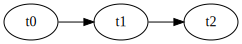

In [40]:
linear = Digraph(graph_attr={'rankdir': 'LR'})
linear.node('t0')
linear.node('t1')
linear.node('t2')
linear.edges([
        ('t0', 't1'),
        ('t1', 't2')
    ])
linear

### But in reality there are a lot of reversions.

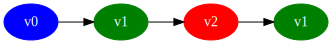

In [28]:
reversions = Digraph(graph_attr={'rankdir': 'LR'}, node_attr={'style': 'filled', 'fontcolor': 'white'})
reversions.node('t0', label='v0', color='blue')
reversions.node('t1', label='v1', color='green')
reversions.node('t2', label='v2', color='red')
reversions.node('t3', label='v1', color='green')
reversions.edges([
        ('t0', 't1'),
        ('t1', 't2'),
        ('t2', 't3'),
    ])
reversions

### A better way to show article histories is as a tree.

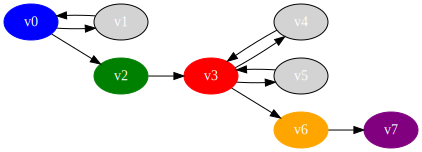

In [30]:
full_tree = Digraph(graph_attr={'rankdir': 'LR'}, node_attr={'style': 'filled', 'fontcolor': 'white'})
full_tree.node('v0', color='blue')
full_tree.node('v1')
full_tree.node('v2', color='green')
full_tree.node('v3', color='red')
full_tree.node('v4')
full_tree.node('v5')
full_tree.node('v6', color='orange')
full_tree.node('v7', color='purple')

full_tree.edges([
        ('v0', 'v1'),
        ('v1', 'v0'),
        ('v0', 'v2'),
        ('v2', 'v3'),
        ('v3', 'v4'),
        ('v4', 'v3'),
        ('v3', 'v5'),
        ('v5', 'v3'),
        ('v3', 'v6'),
        ('v6', 'v7'),
    ])
full_tree

### This is how edits should be counted.

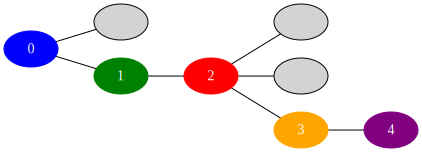

In [54]:
simple = Graph(graph_attr={'rankdir': 'LR'}, node_attr={'style': 'filled', 'fontcolor': 'white'})
simple.node('v0', label='0', color='blue')
simple.node('v1', label='')
simple.node('v2', label='1', color='green')
simple.node('v3', label='2', color='red')
simple.node('v4', label='')
simple.node('v5', label='')
simple.node('v6', label='3', color='orange')
simple.node('v7', label='4', color='purple')

simple.edges([
        ('v0', 'v1'),
        ('v0', 'v2'),
        ('v2', 'v3'),
        ('v3', 'v4'),
        ('v3', 'v5'),
        ('v3', 'v6'),
        ('v6', 'v7'),
    ])
simple

# What does a real Wikipedia article look like?

In [42]:
import wikivision
revisions = wikivision.get_article_revisions('splendid_fairywren')
revisions.head()

,article_slug,timestamp,wikitext
365,splendid_fairywren,2007-05-09 02:59:16,{{Taxobox\n| color = pink\n| name = Splendid F...
364,splendid_fairywren,2007-05-09 03:07:36,{{Taxobox\n| color = pink\n| name = Splendid F...
363,splendid_fairywren,2007-05-09 15:41:56,{{Taxobox\n| color = pink\n| name = Splendid F...
362,splendid_fairywren,2007-05-10 02:21:32,{{Taxobox\n| color = pink\n| name = Splendid F...
361,splendid_fairywren,2007-05-10 06:14:07,{{Taxobox\n| color = pink\n| name = Splendid F...


In [55]:
nodes = revisions.sha.unique()
edges = revisions[['sha1', 'parent_sha1']].to_records(index=False)

splendid_fairywren = Digraph(node_attr={'label': ''})
for name in nodes:
    splendid_fairywren.node(name)
splendid_fairywren.edges(edges)
splendid_fairywren

AttributeError: 'DataFrame' object has no attribute 'sha'